In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_xmin import ds2s_OV_xmin
from lib.funcs import *

In [12]:
x_min = 0.1  # 車両の長さ: 5.0mで換算

L = 10.0  # レーンの長さ: 470m
n_0 = 5

x_0 = ((5.0+3.0)/5.0) * x_min  # 最小車間距離: 車両の長さ+3mで換算
v_0 = (1000/36)/5.0 * x_min  # 車両の最高速度: 法定速度100km/hで換算
dt = 1.0  # 時間差分1秒
dx = 0.1  # テキトー。基本図がいい感じになるように調整

In [13]:
print("x_min={}, L={}, n_0={}, x_0={}, v_0={}, dt={}, dx={}".format(x_min, L, n_0, x_0, v_0, dt, dx))

x_min=0.1, L=10.0, n_0=5, x_0=0.16000000000000003, v_0=0.5555555555555556, dt=1.0, dx=0.1


In [14]:
density_trivial = [K/L for K in range(101)]
flow_trivial = [
	flow_stable(
		density=d,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		xmin=x_min
	) for d in density_trivial
]

In [15]:
ni, nf = 10000, 10100
data1 = {}
for id, K in enumerate(range(101)):
	print("\rid={}".format(id), end="")
	x_init = np.array([x_min * i for i in range(K)], dtype=np.float64)
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_min=x_min,
		x_init=x_init,
		n_max=nf+5,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "{ni} {nf}": model.flow(ni, nf) }
	data1[id] = js

id=1

id=100

In [17]:
density = [js["density"] for js in data1.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data1.values()]

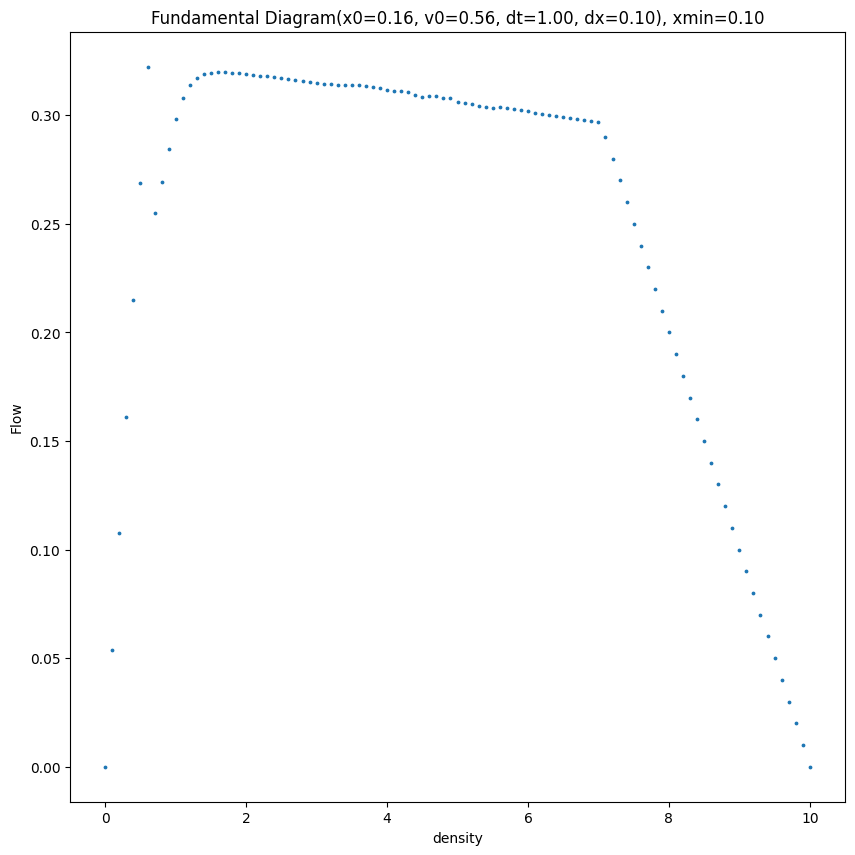

In [18]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f}), xmin={:.2f}"
		.format(x_0, v_0, dt, dx, x_min)
)
plt.scatter(density, flow, s=3)
plt.show()

In [27]:
ni, nf = 10000, 10100
data2 = {}
for id, K in enumerate(range(101)):
	print("\rid={}".format(id), end="")
	x_init = np.array(
		[x_min * i for i in range(K//2)]
			+ [5.0 + x_min * i for i in range((K+1)//2)],
		dtype=np.float64
	)
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_min=x_min,
		x_init=x_init,
		n_max=nf+5,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "{ni} {nf}": model.flow(ni, nf) }
	data2[id] = js

id=100

In [28]:
density = [js["density"] for js in data2.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data2.values()]

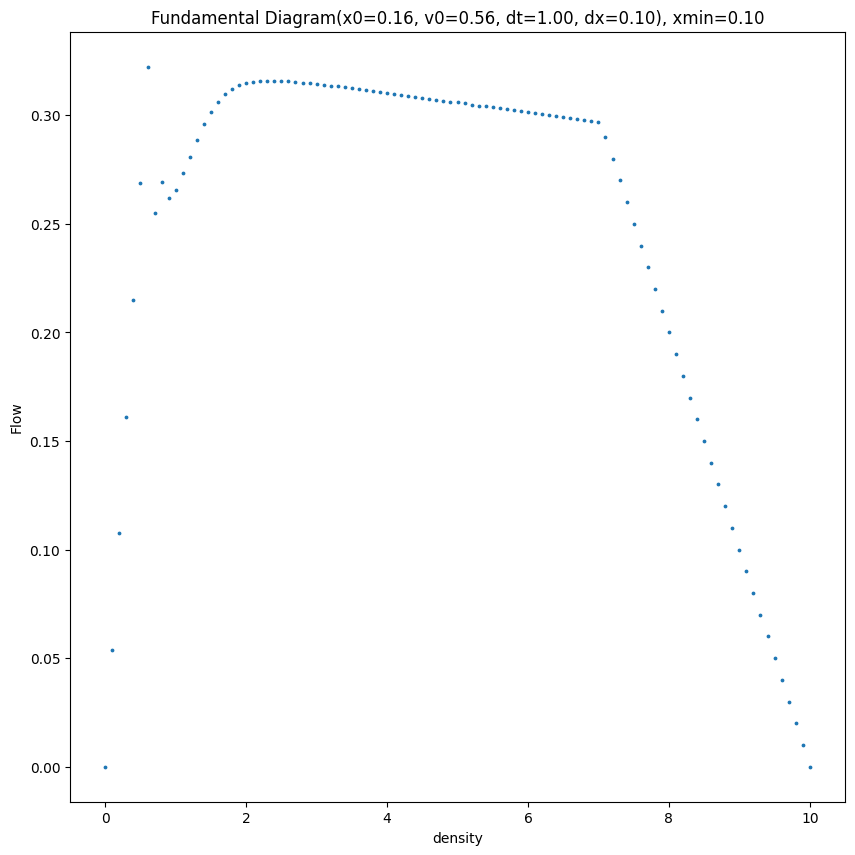

In [29]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f}), xmin={:.2f}"
		.format(x_0, v_0, dt, dx, x_min)
)
plt.scatter(density, flow, s=3)
plt.show()

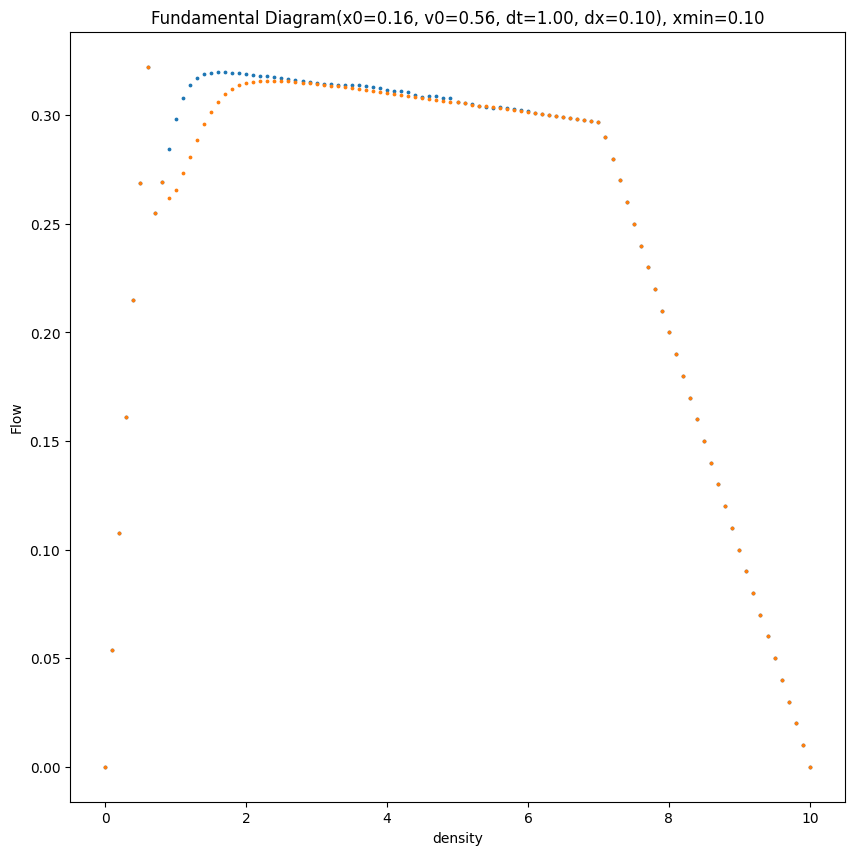

In [33]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f}), xmin={:.2f}"
		.format(x_0, v_0, dt, dx, x_min)
)
density = [js["density"] for js in data1.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data1.values()]
plt.scatter(density, flow, s=3)
density = [js["density"] for js in data2.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data2.values()]
plt.scatter(density, flow, s=3)
plt.show()

In [35]:
ni, nf = 10000, 10100
data3 = {}
for id, K in enumerate(range(101)):
	print("\rid={}".format(id), end="")
	x_init = np.array(
		[x_min * i for i in range(K//3)]
			+ [10.0/3.0 + x_min * i for i in range((K+1)//3)]
			+ [10.0/1.5 + x_min * i for i in range((K+2)//3)],
		dtype=np.float64
	)
	model = ds2s_OV_xmin(
		L=L,
		K=K,
		n_0=n_0,
		x_0=x_0,
		v_0=v_0,
		dt=dt,
		dx=dx,
		x_min=x_min,
		x_init=x_init,
		n_max=nf+5,
	)
	model.simulate()
	js = model.get_json()
	js["flow"] = { "{ni} {nf}": model.flow(ni, nf) }
	data3[id] = js

id=32

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel("density")
plt.ylabel("Flow")
plt.title(
	"Fundamental Diagram"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f}), xmin={:.2f}"
		.format(x_0, v_0, dt, dx, x_min)
)
density = [js["density"] for js in data1.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data1.values()]
plt.scatter(density, flow, s=3)
density = [js["density"] for js in data2.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data2.values()]
plt.scatter(density, flow, s=3)
density = [js["density"] for js in data3.values()]
flow = [js["flow"]["{ni} {nf}"] for js in data3.values()]
plt.scatter(density, flow, s=3)
plt.show()